# Đồ án cuối kỳ môn Lập trình cho KHDL - CSC17104_21KHDL1

---
## 1. Thông tin nhóm: Nhóm 12

- Thành viên:
    - Nguyễn Trọng Đại - 21127587
    - Nguyễn Tấn Khiêm - 21127726

---
## 2. Import thư viện cần thiết

In [340]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

---
## 3. Thu thập dữ liệu

- Bộ dữ liệu [Sleep Health and Lifestyle Dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset) bao gồm 400 hàng và 13 cột, bao gồm nhiều biến số liên quan đến giấc ngủ và thói quen hàng ngày. Nó bao gồm các chi tiết như giới tính, tuổi tác, nghề nghiệp, thời gian ngủ, chất lượng giấc ngủ, mức độ hoạt động thể chất, mức độ căng thẳng, chỉ số BMI, huyết áp, nhịp tim, số bước đi hàng ngày và sự hiện diện hay vắng mặt của rối loạn giấc ngủ.
- Các tính năng chính của Tập dữ liệu:
    + Số liệu toàn diện về giấc ngủ: Khám phá thời lượng, chất lượng giấc ngủ và các yếu tố ảnh hưởng đến kiểu ngủ. 
    + Các yếu tố về lối sống: Phân tích mức độ hoạt động thể chất, mức độ căng thẳng và chỉ số BMI. 
    + Sức khỏe tim mạch: Kiểm tra huyết áp và đo nhịp tim. 
    + Phân tích rối loạn giấc ngủ: Xác định sự xuất hiện của các rối loạn giấc ngủ như Mất ngủ và Ngưng thở khi ngủ.
- Tác giả: [Laksika Tharmalingam](https://www.kaggle.com/uom190346a) (Owner).
- License: [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/) nguồn này là public và no copyright vì vậy nhóm em có thể sao chép, khai thác, sửa đổi và phân phối.
- Ý nghĩa các cột của Dataset:
    - Personal ID: Một định danh cho mỗi cá nhân.
    - Gender: Giới tính của người đó (Male/Female).
    - Age: Tuổi của người đó tính bằng năm.
    - Occupation: Nghề nghiệp hoặc ngành nghề của người đó.
    - Sleep Duration (giờ): Số giờ ngủ của người đó mỗi ngày.
    - Quality of Sleep (thang điểm: 1-10): Đánh giá chủ quan về chất lượng giấc ngủ, có giá trị từ 1 đến 10.
    - Physical Activity Level (phút/ngày): Số phút mà người đó tham gia hoạt động vận động hàng ngày.
    - Stress Level (thang điểm: 1-10): Đánh giá chủ quan về mức độ stress mà người đó trải qua, có giá trị từ 1 đến 10.
    - BMI Category: Phân loại BMI của người đó (ví dụ: Gầy, Bình thường, Thừa cân).
    - Blood Pressure (systolic/diastolic): Đo lường huyết áp của người đó, thường được biểu thị dưới dạng áp systolic trên áp diastolic.
    - Heart Rate (nhịp/phút): Nhịp tim nghỉ của người đó tính bằng nhịp mỗi phút.
    - Daily Steps: Số bước chân mà người đó đi mỗi ngày.
    - Sleep Disorder: Sự có mặt hoặc vắng mặt của rối loạn ngủ ở người đó (Không, Mất ngủ, Ngưng thở khi ngủ).
    - Chi tiết về Cột Sleep Disorder:
        + None: Người đó không có bất kỳ rối loạn ngủ cụ thể nào.
        + Insomnia: Người đó gặp khó khăn khi ngủ hoặc giữ giấc ngủ, dẫn đến giấc ngủ không đủ hoặc chất lượng kém.
        + Sleep Apnea: Người đó gặp phải tình trạng tạm dừng hơi thở trong khi ngủ, dẫn đến việc làm gián đoạn mô hình giấc ngủ và có thể gây nguy cơ về sức khỏe.

---
## 4. Khám phá dữ liệu + Tiền xử lý

### 4.0. Đọc dữ liệu

In [341]:
# TODO: Đọc data từ file csv và lưu vào df. Hiển thị 5 dòng ngẫu nhiên
df = pd.read_csv("./data/Sleep_health_and_lifestyle_dataset.csv")
df.sample(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
21,22,Male,30,Doctor,7.7,7,75,6,Normal,120/80,70,8000,NaN
254,255,Female,45,Teacher,6.5,7,45,4,Overweight,135/90,65,6000,Insomnia
110,111,Female,37,Accountant,7.2,8,60,4,Normal,115/75,68,7000,NaN
278,279,Female,50,Nurse,6.1,6,90,8,Overweight,140/95,75,10000,Insomnia
20,21,Male,30,Doctor,7.7,7,75,6,Normal,120/80,70,8000,NaN


### 4.1. Số dòng, số cột

In [342]:
# TODO: Lưu số dòng vào số cột vào n_rows, n_cols
n_rows, n_cols = df.shape

n_rows, n_cols

(374, 13)

### 4.2. Khám phá dòng

- Nhận xét dòng: các dòng thể hiện khảo sát của một Person ID.

In [343]:
# TODO: Kiểm tra duplicate, lưu vào 'is_duplicated'
is_duplicated = df.duplicated()

print("Dữ liệu có duplicate? :", is_duplicated)

Dữ liệu có duplicate? : 0      False
1      False
2      False
3      False
4      False
       ...  
369    False
370    False
371    False
372    False
373    False
Length: 374, dtype: bool


In [344]:
# TODO: Nếu có duplicate thì loại bỏ nó
df = df.drop_duplicates()

### 4.3. Khám phá cột

- Nhận xét cột: kiểu dữ liệu của các cột đều hợp lý.

In [345]:
# TODO: Liệt kê tên các cột và kiểu dữ liệu tương ứng

# Liệt kê tên các cột và kiểu dữ liệu
column_types = df.dtypes

# Hiển thị thông tin
print("Tên cột và kiểu dữ liệu:")
print(column_types)

Tên cột và kiểu dữ liệu:
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


### 4.4. Loại bỏ các dòng và cột vô nghĩa

- **TODO**: Các dòng trong dataset đều là các khảo sát được thực hiện ở các cá nhân khác nhau nên đều có nghĩa.


In [346]:
# TODO: Loại bỏ các dòng vô nghĩa

- **TODO**: Cột Person ID là vô nghĩa do có thể thấy nó được sắp xếp theo thứ tự tăng dần, nên ta chỉ cần truy xuất vị trí index ta sẽ có được Person ID nếu cần.

In [347]:
# TODO: Loại bỏ các cột vô nghĩa
df = df.drop(columns=['Person ID'])
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


### 4.5. Xử lý data thiếu và chuyển đổi kiểu dữ liệu

- Bảng tóm tắt của Dataframe:

In [348]:
# TODO: Hiển thị bảng tóm tắt của Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


- **Nhận xét:** Ngoài cột `Sleep Disorder` ra thì các cột còn lại không có dữ liệu thiếu. Sở dĩ cột `Sleep Disorder` tồn tại giá trị thiếu là vì tác giả sử dụng `None` để đánh dấu những người không bị rối loạn giấc ngủ (ngủ bình thường). `Pandas` nhận diện các ô `None` thành các ô bị trống, thực chất không phải vậy. Vì vậy, nhóm em sẽ chuyển các giá trị `None` thành `No` để phù hợp với `Pandas`.

In [349]:
# TODO: Xử lý các dòng bị thiếu
df['Sleep Disorder'].fillna('No', inplace=True)
df['Sleep Disorder'].value_counts()

Sleep Disorder
No             219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

- Đối với phần chuyển đổi kiểu dữ liệu, nhìn chung có vẻ tất cả đều đúng kiểu dữ liệu, nhưng nếu để ý thì cột `Blood Pressure` đang chứa cả giá trị của tâm thu và tâm trương (giá trị khi đo huyết áp) và có kiểu là `object`. Để thuận tiện cho việc xử lý sau này, nhóm em sẽ tách cột `Blood Pressure` thành 2 cột `Systolic`(tâm thu) và `Diastolic`(tâm trương) có kiểu là `int64`. Như vậy bộ dữ liệu sẽ có tổng cộng 9 cột `Numeric` và 4 cột `Categorical` (không tính cột `Person ID`).

In [350]:
# TODO: Chuyển đổi kiểu dữ liệu cho đúng
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.extract(r'(\d+)\/(\d+)')
df.drop('Blood Pressure', axis=1, inplace=True)
df.sample(5)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
199,Male,43,Salesperson,6.5,6,45,7,Overweight,72,6000,Insomnia,130,85
214,Male,43,Engineer,7.8,8,90,5,Normal,70,8000,No,130,85
116,Female,37,Accountant,7.2,8,60,4,Normal,68,7000,No,115,75
350,Female,57,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
355,Female,58,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


### 4.6. Phân bố dữ liệu

#### 4.6.1. Dữ liệu Numeric

- Bảng giá trị lượng tử Numeric:

In [351]:
# TODO: Tính giá trị lượng tử (min, 25%, 50%, 75%, max) của từng cột Numeric, lưu vào 'numeric_col_profile'
# 'numeric_col_profile' là 1 dataframe có col là các cột của df, index là 5 giá trị lượng tử


# Lọc ra các cột numeric
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Tính giá trị lượng tử (min, 25%, 50%, 75%, max) cho mỗi cột numeric
def calculate_quantiles(column):
    return pd.Series(np.percentile(column, [0, 25, 50, 75, 100]), index=['min', '25%', '50%', '75%', 'max'])

numeric_col_profile = numeric_columns.apply(calculate_quantiles)

# Hiển thị DataFrame mới
numeric_col_profile


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
min,27.00,5.8,4.0,30.0,3.0,65.0,3000.0
25%,35.25,6.4,6.0,45.0,4.0,68.0,5600.0
50%,43.00,7.2,7.0,60.0,5.0,70.0,7000.0
75%,50.00,7.8,8.0,75.0,7.0,72.0,8000.0
max,59.00,8.5,9.0,90.0,8.0,86.0,10000.0


- Biểu đồ phân bố dữ liệu Numeric:

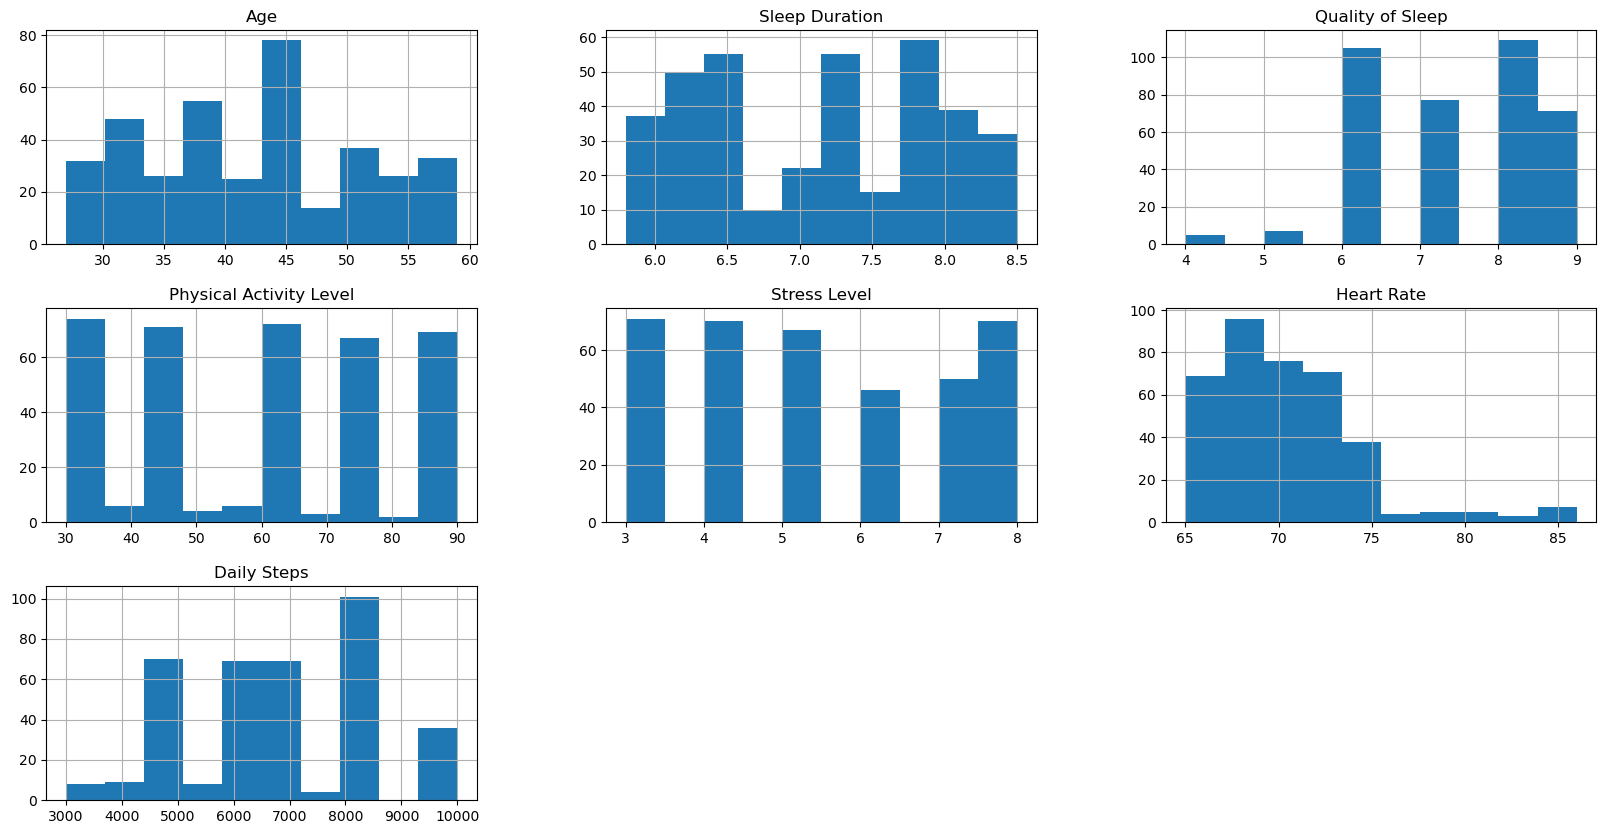

In [352]:
# TODO: In ra biểu đồ cột phân bố dữ liệu Numeric dựa vào 'numeric_col_profile'

numeric_columns.hist(bins=10, figsize=(20,10))
plt.show()

*Nhận xét về sự phân bố dữ liệu của các cột Numeric:*
1. **Age (Độ Tuổi):**
   - Độ tuổi của người được khảo sát nằm trong khoảng 27-59.
   - Phần lớn người có độ tuổi ở mức trung bình (50% ở khoảng 43 tuổi), với người đông nhất ở tuổi 45.
   - Tuổi tăng dần từ 27 đến 59.

2. **Sleep Duration (Thời Gian Ngủ):**
   - Thời gian ngủ trung bình của người được khảo sát là 7.2 giờ.
   - Người có thời gian ngủ ít nhất là 5.8 giờ và nhiều nhất là 8.5 giờ.

3. **Quality of Sleep (Chất lượng Ngủ):**
   - Chất lượng ngủ trung bình là 7.0 điểm trên thang điểm từ 1 đến 9.
   - Người có chất lượng ngủ thấp nhất là 4.0 và cao nhất là 9.0.

4. **Physical Activity Level (Mức Độ Hoạt Động Thể Chất):**
   - Mức độ hoạt động thể chất trung bình là 60.0.
   - Người có mức độ hoạt động thấp nhất là 30.0 và cao nhất là 90.0.

5. **Stress Level (Mức Độ Stress):**
   - Mức độ stress trung bình là 5.0.
   - Người có mức độ stress thấp nhất là 3.0 và cao nhất là 8.0.

6. **Heart Rate (Nhịp Tim):**
   - Nhịp tim trung bình là 70.0 bpm.
   - Người có nhịp tim thấp nhất là 65.0 bpm và cao nhất là 86.0 bpm.

7. **Daily Steps (Bước Chân Hằng Ngày):**
   - Số bước chân trung bình là 7000 bước/ngày.
   - Người có số bước chân ít nhất là 3000 và nhiều nhất là 10000 bước/ngày.

Những thông tin trên cung cấp cái nhìn tổng quan về các chỉ số quan trọng liên quan đến sức khỏe và lối sống của người được khảo sát.

#### 4.6.2. Dữ liệu Categorical

- Bảng phân bố dữ liệu Categorical:

In [353]:
# TODO: Tính các giá trị unique của mỗi cột, và 1 dictionary ứng với mỗi cột có key là giá trị unique, value là số lượng của nó trong cột
# Lưu vào 'single_cate_profile' là 1 dataframe có index là số lượng unique của cột và dictionary tương ứng
# có col là các cột của df
categoricals = df[['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']]
distribution = categoricals.agg(lambda column: column.value_counts().to_dict())
single_cate_profile = pd.DataFrame([categoricals.describe().iloc[1], distribution], index=["num_diff_vals", "distribution"])

single_cate_profile

,Gender,Occupation,BMI Category,Sleep Disorder
num_diff_vals,2,11,4,3
distribution,"{'Male': 189, 'Female': 185}","{'Nurse': 73, 'Doctor': 71, 'Engineer': 63, 'L...","{'Normal': 195, 'Overweight': 148, 'Normal Wei...","{'No': 219, 'Sleep Apnea': 78, 'Insomnia': 77}"


- Biểu đồ phân bố dữ liệu Categorical:

array([[<Axes: ylabel='Gender'>, <Axes: ylabel='Occupation'>],
       [<Axes: ylabel='BMI Category'>, <Axes: ylabel='Sleep Disorder'>]],
      dtype=object)

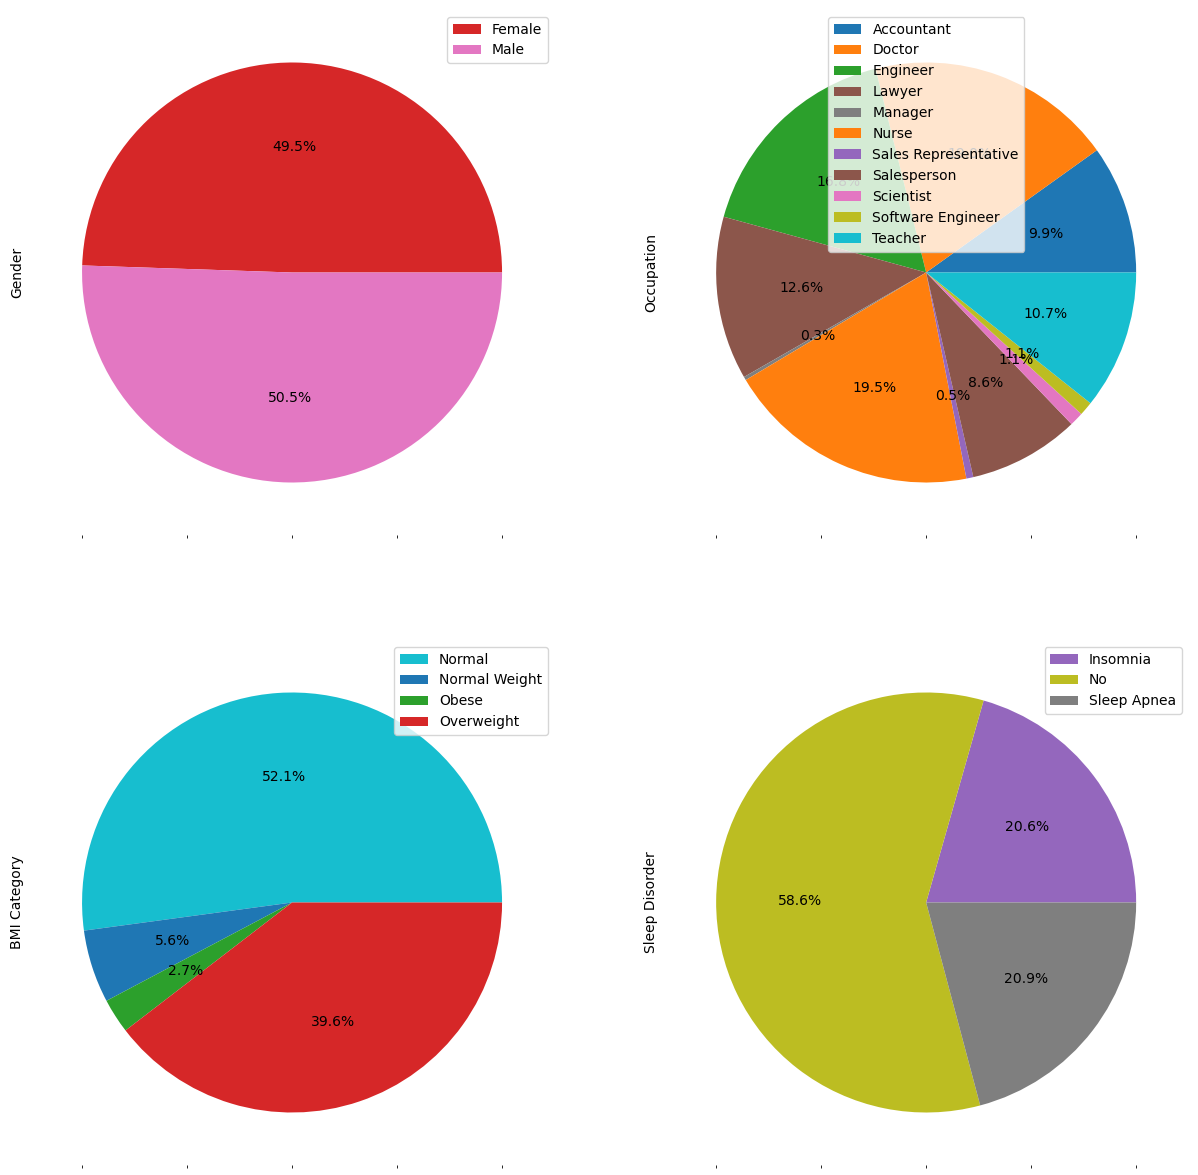

In [354]:
# TODO: In ra biểu đồ hình tròn (pie chart) phân bố dữ liệu Categorical dựa vào 'single_cate_profile'
# Ghi rõ chú thích cho từng biểu đồ.
counts = categoricals.agg(lambda column: column.value_counts()).fillna(0)
counts.plot.pie(subplots=True, layout=(2, 2), figsize=(15, 15), labeldistance=None, autopct=lambda p: '{:.1f}%'.format(round(p, 1)) if p > 0 else '')

- **Nhận xét về các cột Categorical**:
    - `Gender`: Tỷ lệ nam nữ là ngang nhau, cho thấy bộ dữ liệu mang tính cân bằng về giới tính.
    - `Occupation`: Những người tham gia khảo sát có ngành nghề đa dạng, nhưng trong đó `Doctor` và `Nurse` chiếm phần lớn (tổng hơn 40%). Có thể thấy có rất nhiều nhân viên bệnh viện tham gia vào cuộc khảo sát. Điều này có thể giúp ích cho việc tìm ra phương pháp có giấc ngủ tốt chuẩn nhất (Nhóm em tin rằng bác sĩ và y tá là những người chú trọng giữ sức khoẻ của bản thân, bao gồm chất lượng giấc ngủ).
    - `BMI Category`: Chiếm đa số là `Normal`, theo sau là `Overweight`, tỷ lệ giữa người bình thường và người nặng cân, béo phì không quá chênh lệch. Bộ dữ liệu thiếu vắng phân loại `Underweight`(nhẹ cân) là một khuyết điểm lớn vì chúng ta không thể biết liệu nhóm người gầy có ngủ ngon hơn nhóm người béo hay không.
    - `Sleep Disorder`: Sự chênh lệch giữa người không bị và bị rối loạn giấc ngủ (bao gồm `Insomnia` và `Sleep Apnea`) là không quá lớn, bộ dữ liệu mang tính cân bằng về chất lượng giấc ngủ.
- Một thắc mắc về cột `BMI Category` là giá trị `Normal` và `Normal Weight` khác nhau ở chỗ nào?
    - Tác giả của bộ dữ liệu không hề đề cập đến vấn đề này trên Kaggle, một số tài khoản đã hỏi nhưng không có được câu trả lời.
    - Theo nhóm em tìm hiểu về bảng phân loại BMI thì 2 giá trị này là như nhau, vậy nên nhóm em quyết định sẽ hợp nhất 2 giá trị thành `Normal`.

In [355]:
# TODO: Hợp nhất 2 giá trị 'Normal' và 'Normal Weight' thành 'Normal' trong cột 'BMI Category'
df['BMI Category'].replace(['Normal Weight'], 'Normal', inplace=True)
df['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

---
## 5. Đặt câu hỏi có ý nghĩa

### 5.1. Câu hỏi 1: ...

- Thành viên phụ trách: ...
- Mục đích: ...

#### 5.1.1. Tiền xử lý

- Các bước tiền xử lý:
    - ...

In [356]:
# TODO: Code tiền xử lý câu hỏi 1


#### 5.1.2. Phân tích dữ liệu trả lời câu hỏi

- Các bước phân tích dữ liệu:
    - ...

In [357]:
# TODO: Code phân tích dữ liệu để trả lời câu hỏi 1


### 5.2. Câu hỏi 2: ...

- Thành viên phụ trách: ...
- Mục đích: ...

#### 5.2.1. Tiền xử lý

- Các bước tiền xử lý:
    - ...

In [358]:
# TODO: Code tiền xử lý câu hỏi 2


#### 5.2.2. Phân tích dữ liệu trả lời câu hỏi

- Các bước phân tích dữ liệu:
    - ...

In [359]:
# TODO: Code phân tích dữ liệu để trả lời câu hỏi 2


### 5.3. Câu hỏi 3: Liệu có mối liên quan nào giữa mức độ hoạt động vận động hàng ngày và chất lượng giấc ngủ?

- Thành viên phụ trách: Nguyễn Tấn Khiêm
- Mục đích: Điều tra xem liệu việc tăng cường hoạt động vận động có thể ảnh hưởng đến chất lượng giấc ngủ hay không, từ đó có thể đề xuất giải pháp cải thiện giấc ngủ thông qua việc thay đổi mức độ hoạt động hàng ngày.
- Ý tưởng thực hiện: Kết hợp dữ liệu về Quality of Sleep với thông tin về Physical Activity Level và Daily Steps để xác định mức độ ảnh hưởng của chất lượng giấc ngủ đối với hiệu suất công việc và sức khỏe tổng thể.

#### 5.3.1. Tiền xử lý

- Bước tiền xử lý: Lọc ra các cột liên quan đến thể chất bao gôm: Physical Activity Level, Daily Steps.

In [360]:
# TODO: Code tiền xử lý câu hỏi 3
 
# Bước 1
physical_activity_columns = ['Physical Activity Level', 'Daily Steps', 'Quality of Sleep']

physical_activity_df = df[physical_activity_columns]
print(physical_activity_df)

     Physical Activity Level  Daily Steps  Quality of Sleep
0                         42         4200                 6
1                         60        10000                 6
2                         60        10000                 6
3                         30         3000                 4
4                         30         3000                 4
..                       ...          ...               ...
369                       75         7000                 9
370                       75         7000                 9
371                       75         7000                 9
372                       75         7000                 9
373                       75         7000                 9

[374 rows x 3 columns]


- Như vậy dữ liệu ở tất cả các cột cần thiết không bị thiếu. Nhưng có thể thấy các giá trị của các cột đều là dạng nummeric nên ta sẽ chuyển tất cả thành dạng numeric cho dễ xử lý.

In [361]:
# Chuyển type sang numeric
physical_activity_df['Physical Activity Level'] = pd.to_numeric(physical_activity_df['Physical Activity Level'], errors='coerce')
physical_activity_df['Daily Steps'] = pd.to_numeric(physical_activity_df['Daily Steps'], errors='coerce')
physical_activity_df['Quality of Sleep'] = pd.to_numeric(physical_activity_df['Quality of Sleep'], errors='coerce')

#### 5.3.2. Phân tích dữ liệu trả lời câu hỏi

- Các bước phân tích dữ liệu:
    - Bước 1: Xác định các phân vị của các cột.
    - Bước 2: Các giá trị của từng cột sẽ được chia theo phân vị, các giá trị nằm trong khoảng Minimum đến Quartile 1 sẽ là 1(ít/kém), nằm trong khoảng hơn Quartile 1 và Quartile 2 sẽ là 2(trung bình), từ hơn Quartile 2 đến Quartile 3 là 3(khá) và từ hơn Quartile 3 Maximum sẽ là 4(tốt).
    - Bước 3: Đếm xem sự xuất hiện của các giá trị 1,2,3,4 của 'Physical Activity Level' và 'Daily Steps' như thế nào theo nhóm 1,2,3,4 của 'Quality of Sleep'
    - Bước 4: Sử dụng biểu đồ scatter để trực quan hóa.

In [362]:
# TODO: Code phân tích dữ liệu để trả lời câu hỏi 3

# Bước 1
quartiles = physical_activity_df.quantile([0, 0.25, 0.5, 0.75, 1])
quartiles


,Physical Activity Level,Daily Steps,Quality of Sleep
0.00,30.0,3000.0,4.0
0.25,45.0,5600.0,6.0
0.50,60.0,7000.0,7.0
0.75,75.0,8000.0,8.0
1.00,90.0,10000.0,9.0


- Như vậy ta sẽ thay các giá trị của 3 cột 'Physical Activity Level', 'Daily Steps', và 'Quality of Sleep' như sau: 
    - 'Physical Activity Level':
        + Từ 30 đến 45: 1.
        + Từ 45 đến 60: 2.
        + Từ 60 đến 75: 3.
        + Từ 75 đến 90: 4.
    - 'Daily Steps': 
        + Từ 3000 đến 5600: 1.
        + Từ 5600 đến 7000: 2.
        + Từ 7000 đến 8000: 3.
        + Từ 8000 đến 10000: 4.
    - 'Quality of Sleep':
        + Từ 4 đến 6: 1.
        + Từ 6 đến 7: 2.
        + Từ 7 đến 8: 3.
        + Từ 8 đến 9: 4.

In [363]:
# Bước 2
def categorize_value(value, quartiles):
    if value <= quartiles.loc[0.25]:
        return 'Kém'
    elif quartiles.loc[0.25] < value <= quartiles.loc[0.5]:
        return 'Trung bình'
    elif quartiles.loc[0.5] < value <= quartiles.loc[0.75]:
        return 'Khá'
    else:
        return 'Tốt'

# Áp dụng hàm categorize_value cho từng cột
for column in physical_activity_columns:
    physical_activity_df[column] = physical_activity_df[column].apply(categorize_value, args=(quartiles[column],))

physical_activity_df

,Physical Activity Level,Daily Steps,Quality of Sleep
0,Kém,Kém,Kém
1,Trung bình,Tốt,Kém
2,Trung bình,Tốt,Kém
3,Kém,Kém,Kém
4,Kém,Kém,Kém
...,...,...,...
369,Khá,Trung bình,Tốt
370,Khá,Trung bình,Tốt
371,Khá,Trung bình,Tốt
372,Khá,Trung bình,Tốt


In [364]:
# Bước 3
count_by_physical_activity = physical_activity_df.groupby(['Quality of Sleep', 'Physical Activity Level']).size().reset_index(name='Count_Physical_Activity')

# Đếm sự xuất hiện của Daily Steps theo Quality of Sleep
count_by_daily_steps = physical_activity_df.groupby(['Quality of Sleep', 'Daily Steps']).size().reset_index(name='Count_Daily_Steps')

# In kết quả
print("Count by Physical Activity Level:")
print(count_by_physical_activity)
print("\nCount by Daily Steps:")
print(count_by_daily_steps)



Count by Physical Activity Level:
   Quality of Sleep Physical Activity Level  Count_Physical_Activity
0               Khá                     Khá                        5
1               Khá                     Kém                        2
2               Khá              Trung bình                       69
3               Khá                     Tốt                       33
4               Kém                     Kém                       80
5               Kém              Trung bình                        5
6               Kém                     Tốt                       32
7        Trung bình                     Khá                       34
8        Trung bình                     Kém                       36
9        Trung bình              Trung bình                        7
10              Tốt                     Khá                       33
11              Tốt                     Kém                       32
12              Tốt                     Tốt                        6


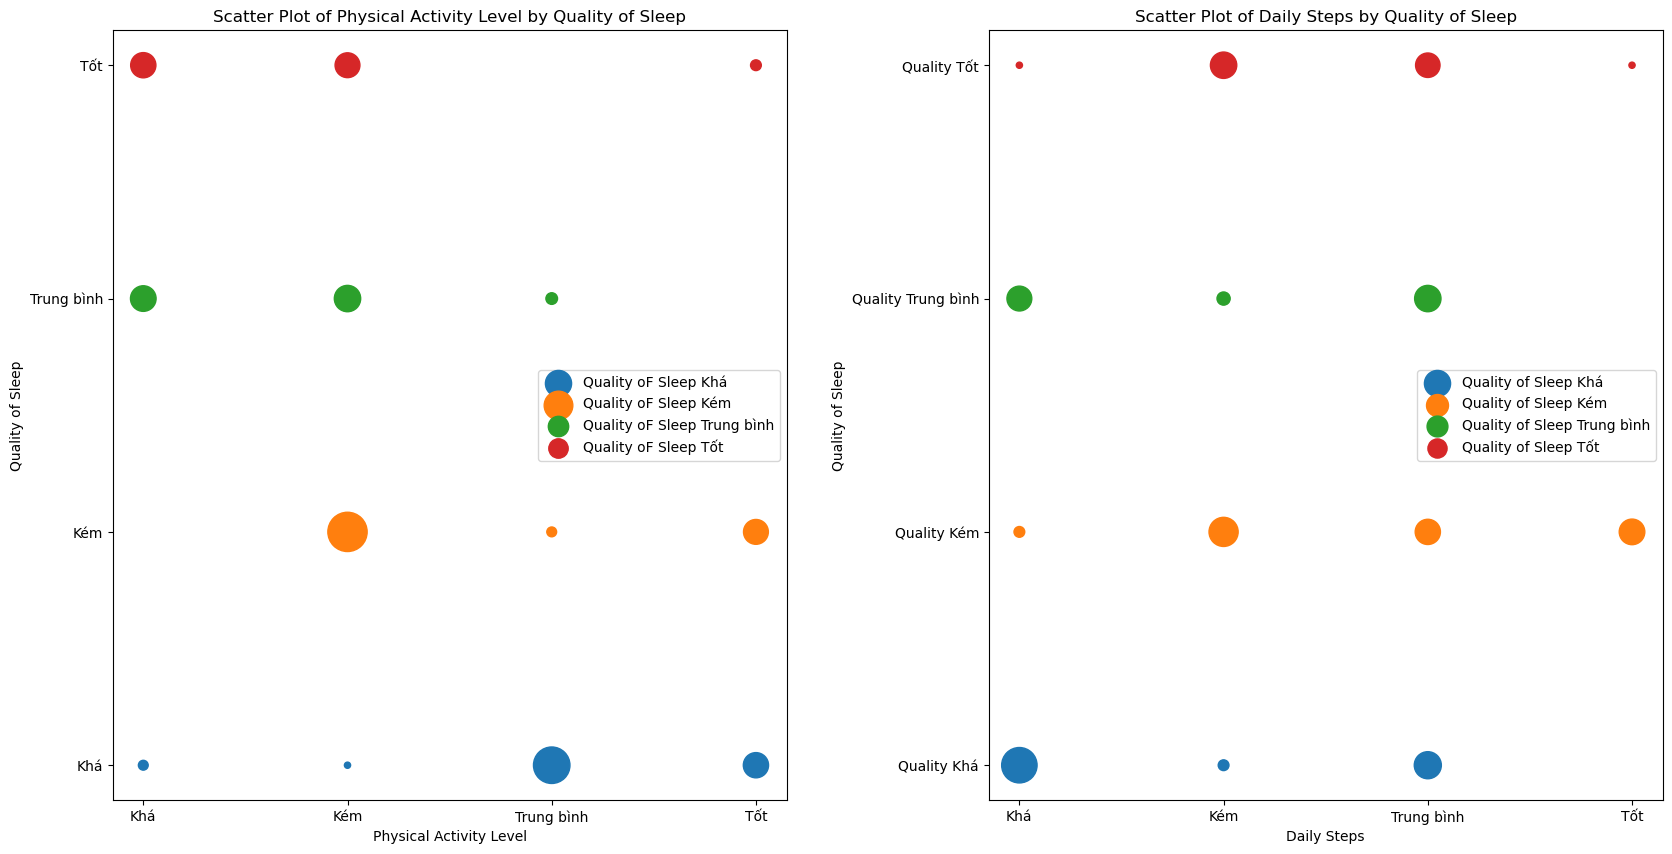

In [373]:
# Bước 4
# Tạo figure và hai axes (subplots)
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Biểu đồ scatter cho Physical Activity Level
for quality, group in count_by_physical_activity.groupby('Quality of Sleep'):
    axs[0].scatter(group['Physical Activity Level'], [quality] * len(group), s=group['Count_Physical_Activity'] * 10, label=f'Quality oF Sleep {quality}')

axs[0].set_title('Scatter Plot of Physical Activity Level by Quality of Sleep')
axs[0].set_xlabel('Physical Activity Level')
axs[0].set_ylabel('Quality of Sleep')
axs[0].set_yticks(count_by_physical_activity['Quality of Sleep'].unique())
axs[0].set_yticklabels([f'{quality}' for quality in count_by_physical_activity['Quality of Sleep'].unique()])
axs[0].legend()

# Biểu đồ scatter cho Daily Steps
for quality, group in count_by_daily_steps.groupby('Quality of Sleep'):
    axs[1].scatter(group['Daily Steps'], [quality] * len(group), s=group['Count_Daily_Steps'] * 10, label=f'Quality of Sleep {quality}')

axs[1].set_title('Scatter Plot of Daily Steps by Quality of Sleep')
axs[1].set_xlabel('Daily Steps')
axs[1].set_ylabel('Quality of Sleep')
axs[1].set_yticks(count_by_daily_steps['Quality of Sleep'].unique())
axs[1].set_yticklabels([f'Quality {quality}' for quality in count_by_daily_steps['Quality of Sleep'].unique()])
axs[1].legend()

plt.subplots_adjust(wspace=0.3)

# Hiển thị figure
plt.show()


- Nhận xét về ảnh hưởng 'Physical Activity Level' lên 'Quality of Sleep': Dựa vào biểu đồ thứ nhất có thể thấy cách phân bố của các giá trị là không có quy luật. Cụ thể: 
    - Những người có 'Physical Activity Level' ở mức 1 tức kém có 'Quality of Sleep' ở mức kém là khá nhiều, tuy nhiên những người có 'Physical Activity Level' ở mức một tức kém mà có 'Quality of Sleep' ở mức trung bình trở lên cũng là là khá nhiều. 
    - Những người có 'Physical Activity Level' ở mức 2 tức trung bình có 'Quality of Sleep' chủ yếu ở mức khá.
    - Những người có 'Physical Activity Level' ở mức 3 tức kém đều có 'Quality of Sleep' ở mức trung bình trở lên.
    - Những người có 'Physical Activity Level' ở mức 4 tức tốt có 'Quality of Sleep' chủ yếu ở mức kém và khá.
- Nhận xét về ảnh hưởng 'Daily Steps' lên 'Quality of Sleep': Dựa vào biểu đồ thứ hai có thể thấy đa số những người khảo sát có 'Daily Steps' nằm trong khoảng trung bình đến khá, những người có 'Daily Steps' tốt là khá ít, điều dễ nhận thấy là 'Daily Steps' tăng từ kém lên khá thì 'Quality of Sleep' ở mức kém sẽ càng giảm. Tuy nhiên, có phần kì lạ là những người có 'Daily Steps' tốt tức đi nhiều lại đa số có 'Quality of Sleep' ở mức 1 tức kém.
- Kết Luận: 
    - Mối liên kết giữa 'Physical Activity Level' và 'Quality of Sleep' là không rõ ràng.
    - Dựa vào mối liên kết giữa 'Daily Steps' và 'Quality of Sleep' ta có thể kết luận rằng nếu 'Daily Steps' ở mức độ vừa phải(ở mức trung bình hoặc khá) có thể giúp ta có 'Quality of Sleep' ở mức tốt hơn. Tuy nhiên nếu 'Daily Steps' quá cao, tức di chuyển quá nhiều có thể khiến ta có 'Quality of Sleep' ở mức kém.

### 5.4. Câu hỏi 4: Làm thế nào chất lượng giấc ngủ ảnh hưởng đến sức khỏe của người tham gia khảo sát?

- Thành viên phụ trách: Nguyễn Tấn Khiêm
- Mục đích: Tìm hiểu về mối quan hệ giữa chất lượng giấc ngủ ảnh hưởng đến sức khỏe tổng thể, nhằm đưa ra những khuyến nghị về quản lý giấc ngủ trong môi trường làm việc.
- Ý tưởng thực hiện: Kết hợp dữ liệu về Quality of Sleep với thông tin về Stress Level, BMI Category, Systolic, Diastolic, Heart Rate và  Sleep Disorder để xác định mức độ ảnh hưởng của chất lượng giấc ngủ đối với hiệu suất công việc và sức khỏe tổng thể.
- Note: Theo Tổ chức Y tế Thế giới WHO, mức huyết áp sau cần được lưu ý:
    - Huyết áp tâm thu nằm trong khoảng từ 90 đến 140 mmHg và huyết áp tâm trương nằm trong khoảng từ 60 đến 90 mmHg sẽ được xem là khoảng giá trị bình thường của huyết áp.
    - Huyết áp thấp được xác định khi huyết áp tâm thu dưới 85 mmHg và/hoặc huyết áp tâm trương dưới 60 mmHg.
    - Tình trạng tăng huyết áp được chẩn đoán nếu huyết áp tâm thu đo được từ 140 mmHg trở lên và/hoặc huyết áp tâm trương từ 90 mmHg trở lên.
 
#### 5.4.1. Tiền xử lý

- Các bước tiền xử lý: 
    - Bước 1: Lọc ra các cột liên quan đến sức khỏe bao gồm: Stress Level, BMI Category, Systolic, Diastolic, Heart Rate, Sleep Disorder và Quality of Sleep.
    - Bước 2: Cho những người khảo sát có triệu chứng 'Sleep Apnea' và 'Insomnia' của cột 'Sleep Disorder' là 1, còn lại là 0 sau đó xóa đi cột 'Sleep Disorder'.
    - Bước 3: Dựa theo Note ở trên, tạo cột 'Blood Pressure Status' hiển thị tình trạng huyết áp của người khảo sát, sau đó xóa đi 'Systolic' và 'Diastolic'.

In [366]:
# TODO: Code tiền xử lý câu hỏi 4
import pandas as pd

# Bước 1: Lọc ra các cột liên quan đến sức khỏe
health_columns = ['Stress Level', 'BMI Category', 'Systolic', 'Diastolic', 'Heart Rate', 'Sleep Disorder', 'Quality of Sleep']
df_health = df[health_columns]

# Bước 2: Tạo cột 'Sleep Apnea or Insomnia' và gán giá trị 1 cho những người có triệu chứng 'Sleep Apnea' hoặc 'Insomnia'
df_health['Sleep Apnea or Insomnia'] = df_health['Sleep Disorder'].apply(lambda x: 1 if x == 'Sleep Apnea' or x=='Insomnia' else 0)

df_health = df_health.drop('Sleep Disorder', axis=1)

# Bước 3
# Chuyển đổi kiểu dữ liệu của 'Systolic' và 'Diastolic' sang int64
df_health[['Systolic', 'Diastolic']] = df_health[['Systolic', 'Diastolic']].astype('int64')

# Tạo cột tình trạng huyết áp
def blood_pressure_status(row):
    if 90 <= row['Systolic'] <= 140 and 60 <= row['Diastolic'] <= 90:
        return 'Normal'
    elif row['Systolic'] < 85 or row['Diastolic'] < 60:
        return 'Low'
    elif row['Systolic'] >= 140 or row['Diastolic'] >= 90:
        return 'High'
    else:
        return 'Unknown'

df_health['Blood Pressure Status'] = df_health.apply(blood_pressure_status, axis=1)

df_health = df_health.drop(['Systolic','Diastolic'], axis=1)
bp_status_counts = df_health['Blood Pressure Status'].value_counts()

print(df_health)
print(bp_status_counts)

min_heart_rate = df_health['Heart Rate'].min()
max_heart_rate = df_health['Heart Rate'].max()

# Hiển thị kết quả
print(f"Giá trị nhỏ nhất của 'Heart Rate': {min_heart_rate}")
print(f"Giá trị lớn nhất của 'Heart Rate': {max_heart_rate}")


     Stress Level BMI Category  Heart Rate  Quality of Sleep  \
0               6   Overweight          77                 6   
1               8       Normal          75                 6   
2               8       Normal          75                 6   
3               8        Obese          85                 4   
4               8        Obese          85                 4   
..            ...          ...         ...               ...   
369             3   Overweight          68                 9   
370             3   Overweight          68                 9   
371             3   Overweight          68                 9   
372             3   Overweight          68                 9   
373             3   Overweight          68                 9   

     Sleep Apnea or Insomnia Blood Pressure Status  
0                          0                Normal  
1                          0                Normal  
2                          0                Normal  
3                  

- Như vậy những người tham gia khảo sát không ai có 'Blood Pressure' là 'Unknown'.
- Có thể thấy nhịp tim của những người tham gia khảo sát dao động từ 65 đến 86. Theo WHO, mức nhịp tim của người bình thường sẽ rơi vào khoảng 60-100 nhịp/phút, tức toàn bộ người tham gia khảo sát không bị vấn về gì về tim. Nên ta sẽ xóa cột 'Heart Rate' đi.

In [367]:
df_health = df_health.drop('Heart Rate', axis=1)

#### 5.4.2. Phân tích dữ liệu trả lời câu hỏi

- Các bước phân tích dữ liệu: 
    - Bước 1: Ta sẽ tiếp tục chia cột 'Quality of Sleep' theo phân vị như Câu hỏi 3. Sau đó xem những người gặp tình trạng 'Sleep Apnea' có phần trăm thế nào theo 'Quality of Sleep'.
    - Bước 2: Xác định phần trăm tình trạng 'High'và 'Normal' của 'Blood Pressure Status' theo từng 'Quality of Sleep'.
    - Bước 3: Tương tự với cột 'BMI Category'.
    - Bước 4: Xem những người có tình trạng 'Sleep Apnea', 'High' ở 'Blood Pressure Status' và bị thừa hoặc thiếu cân sẽ có chất lượng giấc ngủ như thế nào.
    - Bước 5: Xem những người không có tình trạng 'Sleep Apnea', 'Normal' ở 'Blood Pressure Status' và 'BMI Category' sẽ có chất lượng giấc ngủ như thế nào.

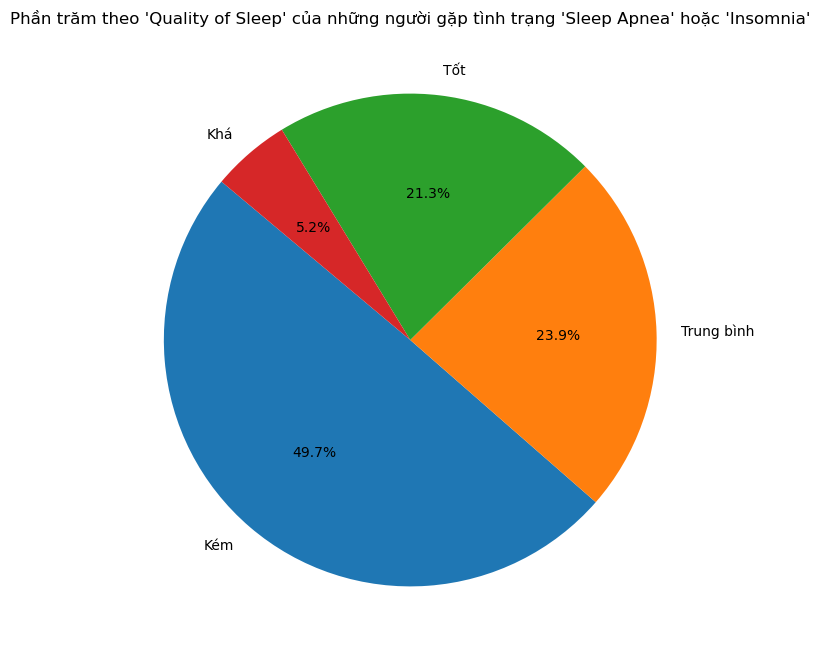

In [368]:
# TODO: Code phân tích dữ liệu để trả lời câu hỏi 4
# Bước 1:
df_health['Quality of Sleep'] = df_health['Quality of Sleep'].apply(categorize_value, args=(quartiles['Quality of Sleep'],))


sleep_apnea_df = df_health[df_health['Sleep Apnea or Insomnia'] == 1]

# Tính phần trăm theo 'Quality of Sleep'
percentage_by_quality_of_sleep = sleep_apnea_df['Quality of Sleep'].value_counts(normalize=True) * 100

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(percentage_by_quality_of_sleep, labels=percentage_by_quality_of_sleep.index, autopct='%1.1f%%', startangle=140)
plt.title("Phần trăm theo 'Quality of Sleep' của những người gặp tình trạng 'Sleep Apnea' hoặc 'Insomnia'")
plt.show()
percentage_by_quality_of_sleep = sleep_apnea_df['Quality of Sleep'].value_counts(normalize=True) * 100

- Dựa vào biểu đồ tròn trên, ta có thể thấy những người gặp tình trạng 'Sleep Apnea' hoặc 'Insomnia' có gần phân nữa là có chất lượng giấc ngủ kém. Trong khi những người có chất lượng giấc ngủ tốt và trung bình có hơn 20% gặp một trung hai tình trạng đó. Những người có chất lượng giấc ngủ khá có ít khả năng nhất, với chỉ khoảng 5%.

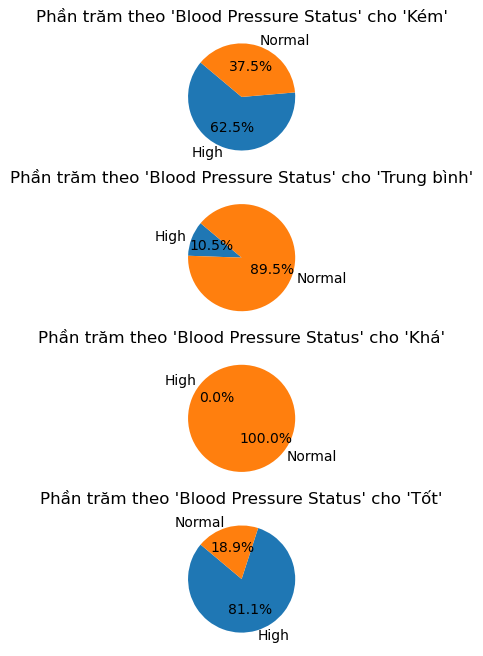

In [369]:

# Tính phần trăm theo 'Blood Pressure Status' cho từng 'Quality of Sleep'
percentage_by_bp_status_and_quality_of_sleep = df_health.groupby(['Blood Pressure Status', 'Quality of Sleep']).size().unstack().div(df_health.groupby('Blood Pressure Status').size(), axis=0) * 100

# Thay thế giá trị NaN bằng 0
percentage_by_bp_status_and_quality_of_sleep = percentage_by_bp_status_and_quality_of_sleep.fillna(0)

# Vẽ biểu đồ tròn
fig, axs = plt.subplots( len(df_health['Quality of Sleep'].unique()),1, figsize=(16, 8))

# Vòng lặp qua từng cột 'Quality of Sleep'
for i, quality_label in enumerate(df_health['Quality of Sleep'].unique()):
    data = percentage_by_bp_status_and_quality_of_sleep.loc[:, quality_label]
    axs[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f"Phần trăm theo 'Blood Pressure Status' cho '{quality_label}'")

plt.show()



- Có thể thấy khi 'Quality of Sleep' tăng từ kém lên khá, tỉ lệ gặp phải tình trạng Cao huyết áp càng giảm, đặc biệt chất lượng giấc ngủ ở mức khá (7 đến 8 điểm) không có trường hợp nào bị Cao huyết áp. Tuy nhiên điều bất ngờ là những người tham gia khảo sát có 'Quality of Sleep' ở mức tốt lại có hơn 80% gặp phải tình trạng Cao huyết áp.

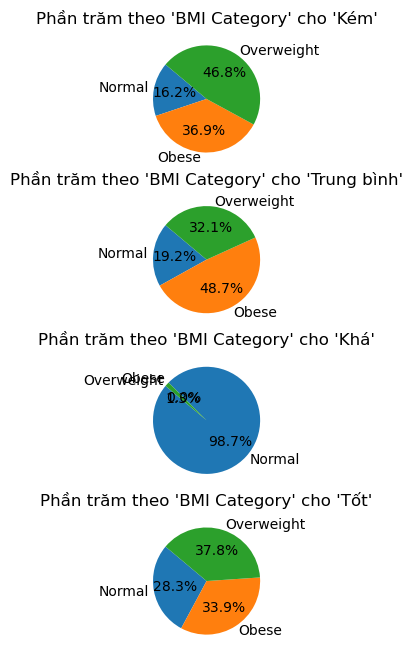

In [370]:
# Tính phần trăm theo 'BMI Category' cho từng 'Quality of Sleep'
percentage_by_bmi_category_and_quality_of_sleep = df_health.groupby(['BMI Category', 'Quality of Sleep']).size().unstack().div(df_health.groupby('BMI Category').size(), axis=0) * 100
# Thay thế giá trị NaN bằng 0
percentage_by_bmi_category_and_quality_of_sleep = percentage_by_bmi_category_and_quality_of_sleep.fillna(0)

fig, axs = plt.subplots(len(df_health['Quality of Sleep'].unique()),1, figsize=(16, 8), subplot_kw=dict(aspect="equal"))

for i, quality_label in enumerate(df_health['Quality of Sleep'].unique()):
    data = percentage_by_bmi_category_and_quality_of_sleep.loc[:, quality_label]
    axs[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f"Phần trăm theo 'BMI Category' cho '{quality_label}'")

plt.show()

- Có thể thấy tương tự như 'Blood Pressure Status', khi 'Quality of Sleep' tăng từ kém lên khá, 'BMI Category' của người tham gia khảo sát sẽ 'Normal' hơn. Ngược lại, những người có chất lượng giấc ngủ kém và trung bình dễ bị mất cân bằng về BMI (thừa cân hoặc thiếu cân). Tuy nhiên, ở những người có chất lượng giấc ngủ tốt thì phần trăm của các tình trạng về BMI lại khá cân bằng.

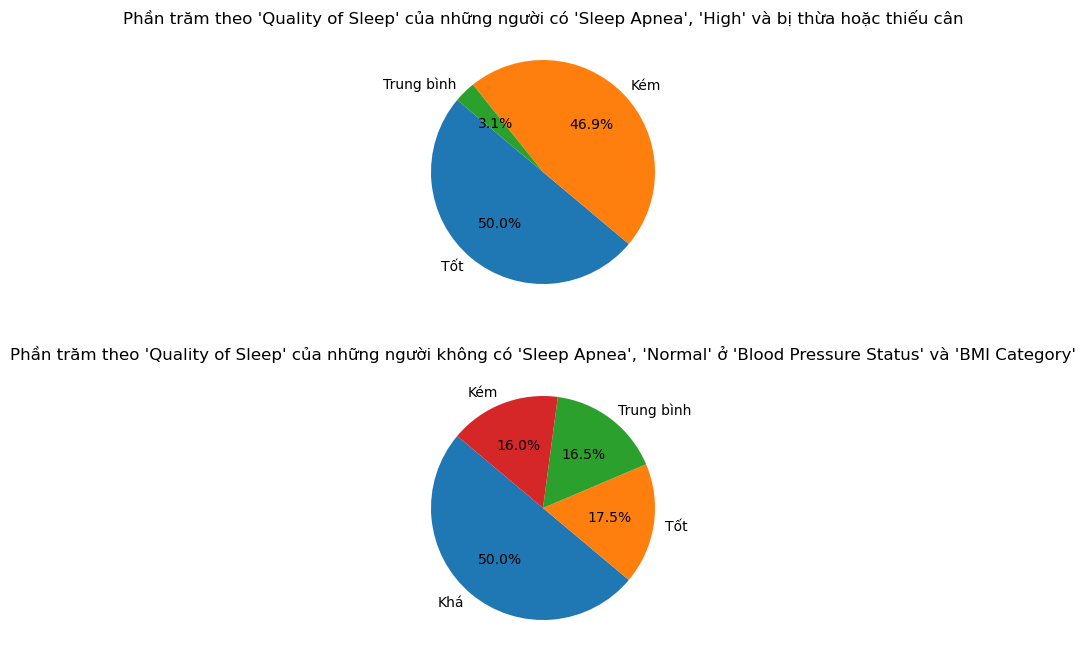

In [371]:
# Lọc những người có tình trạng 'Sleep Apnea' và 'High' ở 'Blood Pressure Status'
filtered_df_high_bp = df_health[(df_health['Sleep Apnea or Insomnia'] == 1) & (df_health['Blood Pressure Status'] == 'High')]

filtered_df_high_bp = filtered_df_high_bp[(filtered_df_high_bp['BMI Category'] == 'Overweight') | (filtered_df_high_bp['BMI Category'] == 'Obese')]

percentage_by_quality_of_sleep_high_bp = filtered_df_high_bp['Quality of Sleep'].value_counts(normalize=True) * 100

filtered_df_normal_bp = df_health[(df_health['Sleep Apnea or Insomnia'] == 0) & (df_health['Blood Pressure Status'] == 'Normal') & (df_health['BMI Category'] == 'Normal')]

percentage_by_quality_of_sleep_normal_bp = filtered_df_normal_bp['Quality of Sleep'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(2, 1, figsize=(16, 8))

axs[0].pie(percentage_by_quality_of_sleep_high_bp, labels=percentage_by_quality_of_sleep_high_bp.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title("Phần trăm theo 'Quality of Sleep' của những người có 'Sleep Apnea', 'High' và bị thừa hoặc thiếu cân")

axs[1].pie(percentage_by_quality_of_sleep_normal_bp, labels=percentage_by_quality_of_sleep_normal_bp.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title("Phần trăm theo 'Quality of Sleep' của những người không có 'Sleep Apnea', 'Normal' ở 'Blood Pressure Status' và 'BMI Category'")

# Hiển thị figure
plt.show()


- Dễ nhận thấy rằng những người gặp phải tất cả tình trạng xấu về sức khỏe đều có chất lượng giấc ngủ kém hoặc tốt.
- Chất lượng giấc ngủ ở mức khá có thể giúp chúng ta cân bằng các chỉ số về huyết áp, BMI và tránh được 'Sleep Apnea' hoặc 'Insomnia'.

- Kết luận: 'Quality of Sleep' ở mức kém có thể ảnh hưởng xấu đến sức khỏe, dễ gặp phải tình trạng 'Sleep Apnea' hoặc 'Insomnia', thừa hoặc thiếu cân và Cao huyết áp. Dễ nhận thấy khi chất lượng giấc ngủ tăng từ kém lên khá, các thông số về sức khỏe đều tăng. Tuy nhiên, ở mức chất lượng giấc ngủ tốt thì khả năng gặp các vấn đề về sức khỏe vẫn khá cao
 => Duy trì 'Quality of Sleep' ở mức khá (7-8 điểm) là tốt nhất.

---
## 6. Phản ánh bản thân sau khi hoàn thành đồ án

### 6.1. Những khó khăn gặp phải?

- Nguyễn Trọng Đại:
    - ...
- Nguyễn Tấn Khiêm:
    - Suy nghĩ hướng giải quyết câu hỏi sao cho hợp lý.
    - Nhận xét, hiểu và kết luận từ Output.
    
### 6.2. Kinh nghiệm, bài học đạt được khi làm đồ án?

- Nguyễn Trọng Đại:
    - ...
- Nguyễn Tấn Khiêm:
    - Hiểu thêm về các yếu tố ảnh hưởng đến giấc ngủ.
    - Tác động của giấc ngủ đến các vấn đề sức khỏe.
    - Biết thêm về các thông số về sức khỏe như Huyết áp, BMI.
    
### 6.3. Nếu có thêm thời gian, nhóm sẽ làm:

-  Lối sống nào có thể làm giảm nguy cơ mắc rối loạn giấc ngủ ?

---
## 7. Tài liệu sử dụng

- ...